# DCN


# 1. Install & Import Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

In [ ]:

import os
import pandas as pd

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import pprint

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import tensorflow as tf
import tensorflow_recommenders as tfrs

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LambdaCallback, EarlyStopping, Callback
from tensorflow.keras.utils import plot_model
import glob

In [ ]:

def get_path(filename):
  return f'/content/drive/MyDrive/tobigs14_conference/data/v_2/wine_meta/{filename}'
'''
# 많은 파일 불러올때
#glob.glob("/content/drive/MyDrive/tobigs14_conference/data/v_2/*")
train = pd.read_json(get_path('train_all_meta_v2.json'))
'''

'\n# 많은 파일 불러올때\n#glob.glob("/content/drive/MyDrive/tobigs14_conference/data/v_2/*")\ntrain = pd.read_json(get_path(\'train_all_meta_v2.json\'))\n'

# 2. Preprocess

In [ ]:
train = pd.read_json('/content/drive/MyDrive/tobigs14_conference/data/validation_set, train_set/train_data.json')
test = pd.read_json('/content/drive/MyDrive/tobigs14_conference/data/v_2/wine_meta/test_all_meta_v2.json')
train_valid= pd.read_json('/content/drive/MyDrive/tobigs14_conference/data/validation_set, train_set/validation_data.json')

In [ ]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
train.head()

,index,user_note,rating_per_user,vintage_id,user_like_count,userID,wine_id,wine_name,url,like,name,rating_count,rating_average,rating_distribution,label_count,review_count,type_id,body,acidity,alcohol,food,grapes,grapes_id,grapes_count,grape_composition,rank,region_id,region_name,country_code,country_most_used_grapes_id,country_most_used_grapes_name,country_most_used_grapes_wines_count,winery_id,winery_name,winery_ratings_count,winery_ratings_average,winery_labels_count,winery_wines_count,user_follower_count,user_following_count,user_rating_count,user_rating_sum,reviews_count
0,13537,Wine of the night and showing where Franchetti...,4.5,1551149,8,5013505,1169881,Toscana Rosson2009,/tenuta-di-trinoro-toscana-rosso/w/1169881?yea...,0,Toscana Rosso,1998.0,4.5,"{'1': 12, '2': 15, '3': 111, '4': 940, '5': 920}",9511.0,14.0,1.0,3.0,2.0,0.0,"[Beef, Lamb, Veal, Poultry, Cured Meat]","[Cabernet Sauvignon, Cabernet Franc, Merlot, P...","[2, 3, 10, 42]","[687800, 229829, 482768, 71286]","{'10': 0, '2': 0, '3': 0, '42': 0}",{'country': {'description': 'Rank within Italy...,394.0,Toscana,it,"[16, 10, 5]","[Sangiovese, Merlot, Chardonnay]","[108135, 482768, 510440]",2531.0,Tenuta di Trinoro,11826.0,4.2,56857.0,10.0,369,73,3008,12112.0,2674
1,44546,"Ok, maybe ten years old 😂. This is by far the ...",5.0,1471250,8,5013505,1172486,Saint-Émilion Grand Crun2006,/tertre-roteboeuf-saint-emilion-grand-cru/w/11...,1,Saint-Émilion Grand Cru,3819.0,4.5,"{'1': 24, '2': 25, '3': 195, '4': 1785, '5': 1...",20439.0,13.0,1.0,4.0,2.0,0.0,"[Beef, Lamb, Game (deer, venison), Poultry]","[Merlot, Cabernet Franc]","[10, 3]","[482768, 229829]",{},{'country': {'description': 'Rank within Franc...,827.0,Saint-Émilion Grand Cru,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",11321.0,Château Tertre Roteboeuf,3819.0,4.5,20439.0,1.0,369,73,3008,12112.0,2674
2,54238,"Again, not my style of wine, but you have to g...",4.5,4456025,9,5013505,1175427,Valbuena 5ºn2014,/vega-sicilia-valbuena-5o/w/1175427?year=2014,0,Valbuena 5º,52568.0,4.6,"{'1': 275, '2': 251, '3': 1883, '4': 22757, '5...",280737.0,224.0,1.0,5.0,3.0,0.0,"[Beef, Lamb, Game (deer, venison)]",[Tempranillo],[19],[148562],{'19': 100},{'country': {'description': 'Rank within Spain...,405.0,Ribera del Duero,es,"[19, 142, 2]","[Tempranillo, Garnacha, Cabernet Sauvignon]","[148562, 49674, 687800]",11050.0,Vega Sicilia,98518.0,4.7,518910.0,7.0,369,73,3008,12112.0,2674
3,54350,Everytime I drink Quintarelli I think of one o...,4.5,1302682,9,5013505,84068,Veneto Rosso del Bepin2008,/quintarelli-giuseppe-veneto-rosso-del-bepi/w/...,0,Veneto Rosso del Bepi,2457.0,4.6,"{'1': 11, '2': 7, '3': 84, '4': 1221, '5': 1134}",10672.0,16.0,1.0,4.0,3.0,0.0,"[Beef, Pasta, Lamb, Game (deer, venison)]","[Corvina, Rondinella, Cabernet Sauvignon]","[43, 45, 2]","[18935, 17175, 687800]","{'10': 0, '43': 0}",{'country': {'description': 'Rank within Italy...,460.0,Veneto,it,"[16, 10, 5]","[Sangiovese, Merlot, Chardonnay]","[108135, 482768, 510440]",11601.0,Quintarelli Giuseppe,29632.0,4.5,127953.0,15.0,369,73,3008,12112.0,2674
4,145429,Ripe but not over blown,4.0,14108325,1,5013505,1386095,Redn2012,/us-cardinale-red/w/1386095?year=2012,0,Red,2203.0,4.6,"{'1': 9, '2': 16, '3': 116, '4': 957, '5': 1105}",10678.0,45.0,1.0,4.0,2.0,14.5,"[Beef, Lamb, Game (deer, venison), Poultry]","[Cabernet Sauvignon, Merlot]","[2, 10]","[687800, 482768]","{'10': 100, '2': 100}",{'country': {'description': 'Rank within Unite...,25.0,Napa Valley,us,"[2, 14, 5]","[Cabernet Sauvignon, Pinot Noir, Chardonnay]","[687800, 483935, 510440]",94901.0,Cardinale,2597.0,4.6,13392.0,2.0,369,73,3008,12112.0,2674


In [ ]:
train.country_code= train.country_code.fillna('un')
train.winery_id= train.winery_id.fillna('un')

In [ ]:
train['grapes_id_unique'] = train.grapes_id.map(lambda x: x[0] if x else 0)

In [ ]:
train = train[~train.food.isna()].reset_index(drop=True)

In [ ]:
train=train.drop(train[train['rank'].isna()].index)

In [ ]:
train=train[~train.type_id.isna()]
train=train[~train.type_id.isna()]

In [ ]:
train=train.drop(train[train['type_id']==25].index)

- int: type_id, body, acidity, like, user_like_count, alchol, rank, grapes_id, winery_id
- str: UserID, wine_id, country_code, 

In [ ]:
train = train[~train.body.isna()].reset_index(drop=True)
train = train[~train.winery_id.isna()].reset_index(drop=True)
train = train[~train.region_id.isna()].reset_index(drop=True)

float 형태 데이터: rating_per_user, rating_average, winery_ratings_average, <br>
grapes_id랑 같은 형태: country_most_used_grapes_wine_count, 

In [ ]:
INT_FEATURES = ["type_id", "body", "acidity", "like", 'user_like_count', 'rating_count', 'alcohol']

for int_feature in INT_FEATURES:
  train[int_feature] = train[int_feature].astype(int)

train.country_code= train.country_code.fillna('un')

In [ ]:
train['grapes_id_unique'] = train.grapes_id.map(lambda x: x[0] if x else 0)

# test data 생성

In [ ]:
test = test[~test.body.isna()].reset_index(drop=True)
test = test[~test.winery_id.isna()].reset_index(drop=True)
test = test[~test.region_id.isna()].reset_index(drop=True)

In [ ]:
INT_FEATURES = ["type_id", "body", "acidity", "like", 'user_like_count', 'rating_count', 'alcohol']


for int_feature in INT_FEATURES:
  test[int_feature] = test[int_feature].astype(int)

test.country_code= test.country_code.fillna('un')
test['grapes_id_unique'] = test.grapes_id.map(lambda x: x[0] if x else 0)

- int: type_id, body, acidity, like, user_like_count, alcohol, grapes_id, winery_id
- str: UserID, wine_id, country_code, 

# validation

In [ ]:
train_valid = train_valid[~train_valid.body.isna()].reset_index(drop=True)
train_valid = train_valid[~train_valid.winery_id.isna()].reset_index(drop=True)
train_valid = train_valid[~train_valid.region_id.isna()].reset_index(drop=True)

In [ ]:
INT_FEATURES = ["type_id", "body", "acidity", "like", 'user_like_count', 'rating_count', 'alcohol']


for int_feature in INT_FEATURES:
  train_valid[int_feature] = train_valid[int_feature].astype(int)
  

train_valid.country_code= train_valid.country_code.fillna('un')
train_valid['grapes_id_unique'] = train_valid.grapes_id.map(lambda x: x[0] if x else 0)

## dic type변경

In [ ]:
INT_FEATURES = ["type_id", "body", "acidity", "like", 'user_like_count', 'rating_count', 'alcohol']

In [ ]:
str_features = ["userID", "country_code", 'wine_id']
int_features = ["type_id", "body", "acidity", "like", 'user_like_count', 'rating_count', 'alcohol', 'grapes_id_unique']

In [ ]:
train_str_dict = {
    str_feature: [str(val).encode() for val in train[str_feature].values]
    for str_feature in str_features
}

train_int_dict = {
    int_feature: train[int_feature].values
    for int_feature in int_features
}

In [ ]:
train_str_dict.update(train_int_dict)
train_str_dict.keys()

dict_keys(['userID', 'country_code', 'wine_id', 'type_id', 'body', 'acidity', 'like', 'user_like_count', 'rating_count', 'alcohol', 'grapes_id_unique'])

In [ ]:
test_str_dict = {
    str_feature: [str(val).encode() for val in test[str_feature].values]
    for str_feature in str_features
}

test_int_dict = {
    int_feature: test[int_feature].values
    for int_feature in int_features
}

test_str_dict.update(test_int_dict)
test_str_dict.keys()

dict_keys(['userID', 'country_code', 'wine_id', 'type_id', 'body', 'acidity', 'like', 'user_like_count', 'rating_count', 'alcohol', 'grapes_id_unique'])

In [ ]:
train = tf.data.Dataset.from_tensor_slices(train_str_dict)
test = tf.data.Dataset.from_tensor_slices(test_str_dict)

In [ ]:
train_val_str_dict = {
    str_feature: [str(val).encode() for val in train_valid[str_feature].values]
    for str_feature in str_features
}

train_val_int_dict = {
    int_feature: train_valid[int_feature].values
    for int_feature in int_features
}
train_val_str_dict.update(train_val_int_dict)
train_val_str_dict.keys()

dict_keys(['userID', 'country_code', 'wine_id', 'type_id', 'body', 'acidity', 'like', 'user_like_count', 'rating_count', 'alcohol', 'grapes_id_unique'])

In [ ]:
train_valid = tf.data.Dataset.from_tensor_slices(train_val_str_dict)

In [ ]:
# tf.keras.layers.experimental.preprocessing.
feature_names = ["userID", "country_code", 'grapes_id_unique', "type_id", "body", "acidity", "like", 'user_like_count', 'rating_count', 'alcohol', 'wine_id']

In [ ]:
vocabularies = {}

for feature_name in feature_names:
  vocab = train.batch(1_000_000).map(lambda x: x[feature_name])
  vocabularies[feature_name] = np.unique(np.concatenate(list(vocab)))

In [ ]:
vocabularies

{'acidity': array([1, 2, 3]),
 'alcohol': array([  0,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  80, 112, 114, 135]),
 'body': array([1, 2, 3, 4, 5]),
 'country_code': array([b'ar', b'at', b'au', b'br', b'ca', b'ch', b'cl', b'de', b'es',
        b'fr', b'gb', b'gr', b'hu', b'il', b'it', b'jp', b'lu', b'mx',
        b'nz', b'pt', b'ru', b'us', b'uy', b'za'], dtype=object),
 'grapes_id_unique': array([   0,    1,    2,    3,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   29,   31,   32,   33,   34,   35,   36,   37,
          38,   39,   40,   41,   42,   43,   44,   45,   46,   47,   48,
          49,   50,   51,   52,   53,   54,   55,   56,   57,   58,   59,
          62,   63,   64,   67,   68,   69,   70,   71,   74,   75,   76,
          77,   78,   80,   81,   82,   83,   85,   86,   88,   89,   91,
          92,   93,   94, 

# Model

In [ ]:
class DCN(tfrs.Model):

  def __init__(self, use_cross_layer, deep_layer_sizes, projection_dim=None):
    super().__init__()

    self.embedding_dimension = 32

    str_features = ["userID", "country_code", 'wine_id']
    int_features = ["type_id", "body", "acidity", 'user_like_count', 'rating_count', 'alcohol', 'grapes_id_unique']

    self._all_features = str_features + int_features
    self._embeddings = {}

    # Compute embeddings for string features.
    for feature_name in str_features:
      vocabulary = vocabularies[feature_name]
      self._embeddings[feature_name] = tf.keras.Sequential(
          [tf.keras.layers.experimental.preprocessing.StringLookup(
              vocabulary=vocabulary, mask_token=None),
           tf.keras.layers.Embedding(len(vocabulary) + 1,
                                     self.embedding_dimension)
    ])
      
    # Compute embeddings for int features.
    for feature_name in int_features:
      vocabulary = vocabularies[feature_name]
      self._embeddings[feature_name] = tf.keras.Sequential(
          [tf.keras.layers.experimental.preprocessing.IntegerLookup(
              vocabulary=vocabulary, mask_value=None),
           tf.keras.layers.Embedding(len(vocabulary) + 1,
                                     self.embedding_dimension)
    ])

    if use_cross_layer:
      self._cross_layer = tfrs.layers.dcn.Cross(
          projection_dim=projection_dim,
          kernel_initializer="glorot_uniform")
    else:
      self._cross_layer = None

    self._deep_layers = [tf.keras.layers.Dense(layer_size, activation="relu")
      for layer_size in deep_layer_sizes]

    self._logit_layer = tf.keras.layers.Dense(1, activation = 'sigmoid')

    self.task = tfrs.tasks.Ranking(
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=[tf.keras.metrics.BinaryCrossentropy("binary_crossentropy")]
    )

  def call(self, features):
    # Concatenate embeddings
    embeddings = []
    for feature_name in self._all_features:
      embedding_fn = self._embeddings[feature_name]
      embeddings.append(embedding_fn(features[feature_name]))

    x = tf.concat(embeddings, axis=1)

    # Build Cross Network
    if self._cross_layer is not None:
      x = self._cross_layer(x)
    
    # Build Deep Network
    for deep_layer in self._deep_layers:
      x = deep_layer(x)

    return self._logit_layer(x)

  def compute_loss(self, features, training=False):
    labels = features.pop("like")
    scores = self(features)
    return self.task(
        labels=labels,
        predictions=scores,
    )

In [ ]:
learning_rate = 0.001

In [ ]:
cached_train = train.shuffle(100_000).batch(8192).cache()
cached_val_train = train_valid.shuffle(100_000).batch(8192).cache()
cached_test = test.batch(5989).cache()

In [ ]:
model = DCN(use_cross_layer=True, deep_layer_sizes=[192, 192], projection_dim=None)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate))

# Train & Result

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import tensorflow_datasets as tfds

cached_test_numpy = tfds.as_numpy(cached_test)
y_true = [item['like'] for item in cached_test_numpy]
y_true = np.concatenate(y_true)

In [ ]:
def get_result(model):
  y_pred = model.predict(cached_test).flatten()
  y_pred_class = [1 if pred > 0.5 else 0 for pred in y_pred]

  print(f"ROC: {roc_auc_score(y_true, y_pred)}")
  print(classification_report(y_true, y_pred_class))

In [ ]:
from keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=20)

In [ ]:
history= model.fit(cached_train,  epochs=500, verbose=True, callbacks=[callback], validation_data=cached_val_train)

Epoch 1/500
70/70 [==============================] - 11s 125ms/step - binary_crossentropy: 0.6399 - loss: 0.6390 - regularization_loss: 0.0000e+00 - total_loss: 0.6390 - val_binary_crossentropy: 0.6371 - val_loss: 0.6423 - val_regularization_loss: 0.0000e+00 - val_total_loss: 0.6423
Epoch 2/500
70/70 [==============================] - 2s 26ms/step - binary_crossentropy: 0.5477 - loss: 0.5473 - regularization_loss: 0.0000e+00 - total_loss: 0.5473 - val_binary_crossentropy: 0.6642 - val_loss: 0.6696 - val_regularization_loss: 0.0000e+00 - val_total_loss: 0.6696
Epoch 3/500
70/70 [==============================] - 2s 26ms/step - binary_crossentropy: 0.5179 - loss: 0.5175 - regularization_loss: 0.0000e+00 - total_loss: 0.5175 - val_binary_crossentropy: 0.6843 - val_loss: 0.6859 - val_regularization_loss: 0.0000e+00 - val_total_loss: 0.6859
Epoch 4/500
70/70 [==============================] - 2s 25ms/step - binary_crossentropy: 0.5062 - loss: 0.5059 - regularization_loss: 0.0000e+00 - total

In [ ]:
get_result(model)

ROC: 0.9254891960966275
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     80975
           1       0.88      0.86      0.87     93390

    accuracy                           0.87    174365
   macro avg       0.86      0.87      0.87    174365
weighted avg       0.87      0.87      0.87    174365



In [ ]:
model.summary()

Model: "dcn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 32)                128       
_________________________________________________________________
sequential_8 (Sequential)    (None, 32)                800       
_________________________________________________________________
sequential_4 (Sequential)    (None, 32)                192       
_________________________________________________________________
sequential_1 (Sequential)    (None, 32)                800       
_________________________________________________________________
sequential_9 (Sequential)    (None, 32)                12768     
_________________________________________________________________
sequential_7 (Sequential)    (None, 32)                247552    
_________________________________________________________________
sequential_3 (Sequential)    (None, 32)                224     

<Figure size 648x648 with 0 Axes>

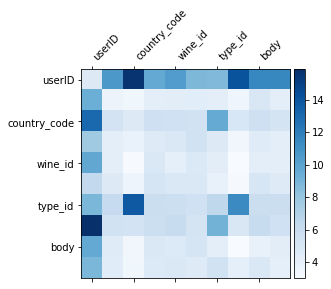

In [ ]:
mat = model._cross_layer._dense.kernel
features = model._all_features

block_norm = np.ones([len(features), len(features)])

dim = model.embedding_dimension

# Compute the norms of the blocks.
for i in range(len(features)):
  for j in range(len(features)):
    block = mat[i * dim:(i + 1) * dim,
                j * dim:(j + 1) * dim]
    block_norm[i,j] = np.linalg.norm(block, ord="fro")

plt.figure(figsize=(9,9))
im = plt.matshow(block_norm, cmap=plt.cm.Blues)
ax = plt.gca()
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
cax.tick_params(labelsize=10) 
_ = ax.set_xticklabels([""] + features, rotation=45, ha="left", fontsize=10)
_ = ax.set_yticklabels([""] + features, fontsize=10)

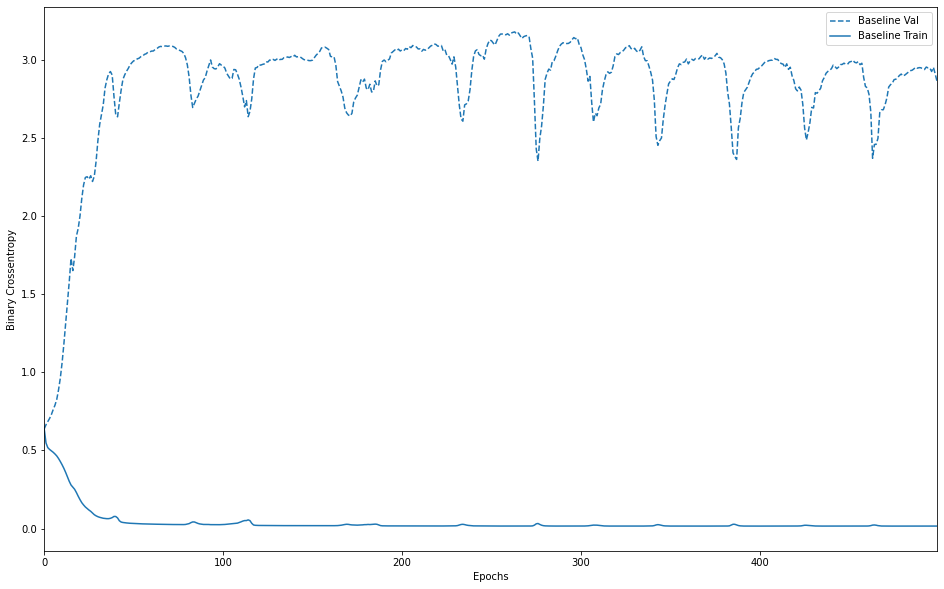

In [ ]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', history)])